## ML4DS Lab: Week 3: Classification Part 1.

### Aims:
    * Practice K-Nearest Neighbour.
    * Practice Logistic Regression.
    * Compare classifiers with ROC and AUC.


### Task 1: K - Nearest Neighbours

#### Task 1.1: Import and load the data:

In [2]:
import warnings
warnings.filterwarnings('ignore')

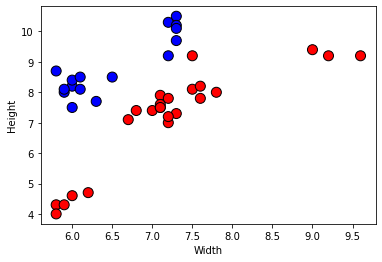

In [3]:
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

data = np.loadtxt('orange_lemon.txt', delimiter = ',')  # Load the orange and lemon data in the txt file.

# Plot data.
X = data[:, 1:3]  # Width and height.
t = data[:, 0]  # True classification.
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

#### Task 1.2: Test KNN with orange and lemon data.

Create a 2-d grid of points. Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max].

In [4]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Train KNN using orange and lemon data, test on the created mesh grid, and plot the results.

References:
- `KNeighborsClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- `pcolormesh`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html

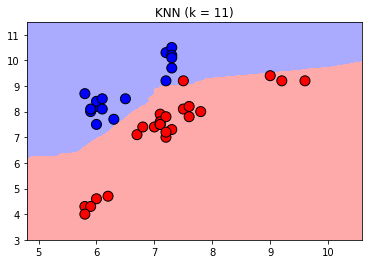

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k = 11
knn = KNeighborsClassifier(k).fit(X, t)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('KNN (k = %i)' % k)
plt.show()

#### Task 1.3: Use cross-validation to determine the number of neighbours.

Try different range of possible number of neighbors.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Minimum 5-fold average CV error: 0.0


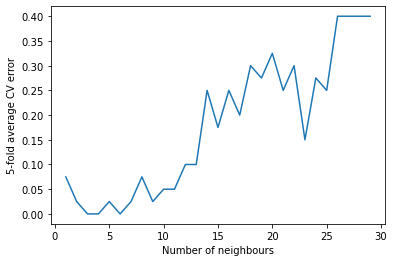

In [6]:
cv_scores = []
fold = 5

for k in range(1, 30):
    knn_cv = KNeighborsClassifier(k)
    cv_scores.append(1 - np.mean(cross_val_score(knn_cv, X, t, cv = fold)))

print('Minimum %i-fold average CV error: %s' % (fold, np.min(cv_scores)))
plt.plot(np.arange(1, 30), cv_scores)
plt.xlabel('Number of neighbours')
plt.ylabel('%i-fold average CV error' % fold)
plt.show()

Try out different number of neighbors, and check when you loss one of your classes.

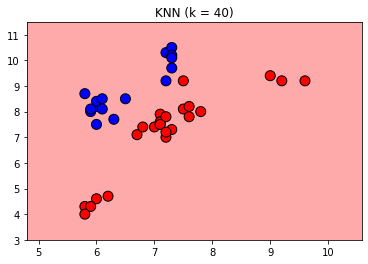

In [7]:
k = 40
knn = KNeighborsClassifier(k).fit(X, t)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('KNN (k = %i)' % k)
plt.show()

#### Task 1.4: Try out the 'weight' parameter:

KNN has a weight paramenter. See if it can rescue the classification.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

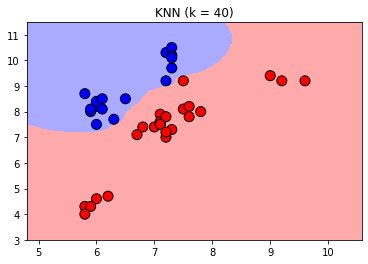

In [8]:
k = 40
knn = KNeighborsClassifier(k, weights = 'distance').fit(X, t)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('KNN (k = %i)' % k)
plt.show()

### Task 2: Logistic Regression.

#### Task 2.1: Train a Logistic Regression classifier with orange and lemon data

Plot the probabilities. Also check the CV error.

5-fold average CV error: 0.050000000000000044


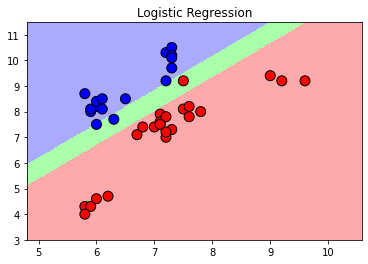

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
fold = 5
mean_cv_score = np.mean(cross_val_score(lr, X, t, cv = fold))
print('%i-fold average CV error: %s' % (fold, 1 - mean_cv_score))

lr.fit(X, t)
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression')
plt.show()

#### Task 2.2: Train a  L2 Regularised Logistic Regression.

Define a range of different strength of regularisation.

In [10]:
from sklearn.svm import l1_min_c
from sklearn.model_selection import GridSearchCV

c_list = l1_min_c(X, t, loss = 'log') * np.logspace(0, 7, 16)
print(c_list)

[2.89435601e-02 8.47653998e-02 2.48247728e-01 7.27029358e-01
 2.12921058e+00 6.23570098e+00 1.82621518e+01 5.34833516e+01
 1.56633727e+02 4.58724513e+02 1.34344105e+03 3.93446133e+03
 1.15226388e+04 3.37457135e+04 9.88292004e+04 2.89435601e+05]


Use `GridSearchCV` to find the optimal regularisation strength, fit the corresponding L2 regularised logistic regression model, plot the classification result, and check the CV error.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

5-fold average CV error: 0.025000000000000022


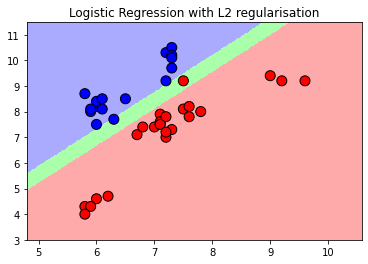

In [11]:
parameters = {'C': c_list}
fold = 5
lr = LogisticRegression(max_iter = 1e4, penalty = 'l2', tol = 1e-5)
lr_cv = GridSearchCV(lr, parameters, cv = fold).fit(X, t)
print('%i-fold average CV error: %s' % (fold, 1 - lr_cv.best_score_))

Z = lr_cv.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression with L2 regularisation')
plt.show()

### Task 3: Compare classifiers with ROC and AUC.

#### Task 3.1: ROC and AUC on Logistic Regression

Load data from a different dataset.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
t = breast_cancer.target

Use the `train_test_split` function to create a training and testing split. The figures are produced with 'random_state=123'. Plot the ROC curve for a Logistic Regression classifier with your training and test data, and compute the AUC.

References:
- `roc_curve`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `roc_auc_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

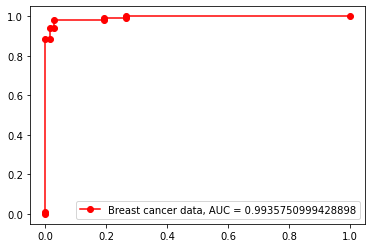

In [13]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3, random_state = 123)
lr = LogisticRegression().fit(X_train, t_train)
t_pred_proba = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(t_test, t_pred_proba)
lr_auc = metrics.roc_auc_score(t_test, t_pred_proba)

plt.plot(lr_fpr, lr_tpr, 'ro-', label = 'Breast cancer data, AUC = ' + str(lr_auc))
plt.legend(loc = 4)
plt.show()

#### Task 3.2: ROC and AUC on K-Nearest Neighbours.

Plot the ROC curve for a KNN classifier with your training and test data, and compute the AUC.

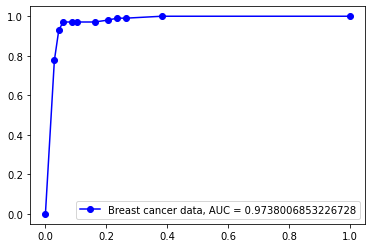

In [14]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
knn = KNeighborsClassifier(k).fit(X_train, t_train)
t_pred_proba = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(t_test, t_pred_proba)
knn_auc = metrics.roc_auc_score(t_test, t_pred_proba)

plt.plot(knn_fpr, knn_tpr, 'bo-', label = 'Breast cancer data, AUC = ' + str(knn_auc))
plt.legend(loc = 4)
plt.show()

#### Task 3.3: Comparison of Logistic Regression and KNN ROCs.

Overlay the two ROC curves.

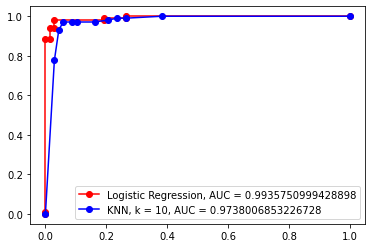

In [15]:
plt.plot(lr_fpr, lr_tpr, 'ro-', label = 'Logistic Regression, AUC = ' + str(lr_auc))
plt.plot(knn_fpr, knn_tpr, 'bo-', label = 'KNN, k = %i, AUC = %s' % (k, knn_auc))
plt.legend(loc = 4)
plt.show()

#### Task 3.4: Run cross validation using AUC as the performance matrix for the two classifiers 

In [16]:
fold = 5
lr_cv_auc = np.mean(cross_val_score(lr, X, t, scoring = 'roc_auc', cv = fold))
knn_cv_auc = np.mean(cross_val_score(knn, X, t, scoring = 'roc_auc', cv = 5))
print('Logistic Regression, %i-fold average AUC = %s' % (fold, lr_cv_auc))
print('KNN, k = %i, %i-fold average AUC = %s' % (k, fold, knn_cv_auc))

Logistic Regression, 5-fold average AUC = 0.9892508149673234
KNN, k = 10, 5-fold average AUC = 0.9676910623950421
